In [3]:
%pylab inline
%matplotlib inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# SVM, support vector machine

<img src='imgs/svm.jpg'>

Дискриминантная функция: $$f(\overline{x}, \overline{w}, w_0) = \langle \overline{w}, \overline{x} \rangle - w_0$$

Решающее правило: $$a(\overline{x}, \overline{w}, w_0) = 
sign \big( { \langle \overline{w}, \overline{x} \rangle - w_0 } \big).$$

Критерий - минимизация эмпирического риска:

$$
  \sum_{i=1}^{l} \Bigl[ a(\overline{x_i}, \overline{w}, w_0) \ne y_i \Bigr] =   \sum_{i=1}^{l} \Bigl[ M_i(\overline{w}, w_0) < 0 \Bigr] \longrightarrow  \displaystyle \min_{\overline{w}, w_0}
$$

$$ где\;M_i(\overline{w}, w_0) = ( \langle \overline{w}, \overline{x_i} \rangle - w_0 ) \cdot y_i$$

SVM предлагает минимизировать следующую функцию:

$$
Q(\overline{w}, w_0) = \sum_{i=1}^{l} \Bigl[ M_i(\overline{w}, w_0) < 0 \Bigr] \leqslant \sum_{i=1}^{l} \bigl(1 - M_i(\overline{w}, w_0) \bigr)_{\!+} + \frac{1}{C} \sum_{j=1}^{n}w_j^2 \longrightarrow  \displaystyle \min_{\overline{w}, w_0}
$$

<img src='../lesson5/imgs/2.jpg'>


<img src="imgs/3.png" width=400>

Задача
$$
Q_{new}(\overline{w}, w_0) ≡ \sum_{i=1}^{l} \bigl(1 - M_i(\overline{w}, w_0) \bigr)_{\!+} + \frac{1}{C} \sum_{j=1}^{n}w_j^2 \longrightarrow  \displaystyle \min_{\overline{w}, w_0}
$$

Эквивалентна задаче (<a href="http://www.ccas.ru/voron/download/SVM.pdf">доказательство</a>):

$$ 
\begin{equation*}
\begin{cases}
    -\sum_{i=1}^{l}\lambda _i + \frac{1}{2}\sum_{i=1}^{l}\sum_{j=1}^{l}\lambda _i\lambda _j y_i y_j \langle \overline{x_i}, \overline{x_k} \rangle  \longrightarrow  \displaystyle \min_{\lambda}\\
    0 \leqslant \lambda _i \leqslant C, \;\;\;\; i = 1,... ,l\\
    \sum_{i=1}^{l}\lambda _i y_i = 0
\end{cases}
\end{equation*}
$$

Новое решающее правило:

$$a(\overline{x}, \overline{w}, w_0) = 
sign \big( \sum_{i=1} ^{l} \bigl(\lambda _i \cdot \langle \overline{x_i}, \overline{x} \rangle \cdot y_i\bigr)  - w_0 \bigr).$$

$$где \; w_0 = \sum_{i=1} ^{l} \bigl(\lambda _i \cdot \langle \overline{x_i}, \overline{x_k} \rangle \cdot y_i - y_k\bigr) \; для \;такого \;k, \;что\;  \lambda_k > 0, \;M_j=1$$

# Kernel trick
$$\varphi: X \rightarrow H$$

$$K(\overline{x}, \overline{x}') =  \langle \varphi(\overline{x}),\varphi(\overline{x}') \rangle $$

<img src="imgs/4.jpg" width=700>
Код, который генерит эти изображения:
http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py

In [4]:
from IPython.display import HTML

HTML(data="""<iframe width="854" height="480" src="https://www.youtube.com/embed/3liCbRZPrZA" 
            frameborder="0" allowfullscreen></iframe>""")

In [6]:
HTML(data="""<iframe width="854" height="480" src="https://www.youtube.com/embed/MxUy7hKIU8c" 
frameborder="0" allowfullscreen></iframe>""")

Populating the interactive namespace from numpy and matplotlib


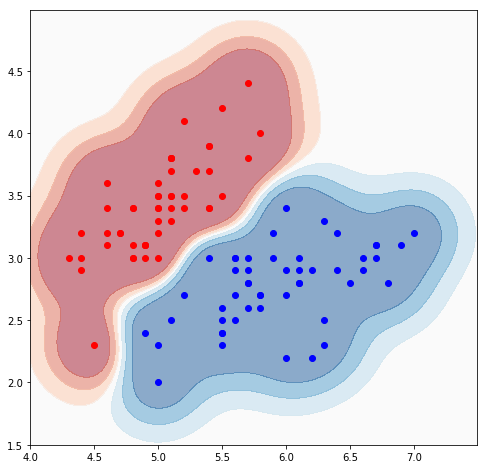

In [3]:
from sklearn.datasets import load_iris
%matplotlib inline
%pylab inline

figure(figsize=(8,8))
iris = load_iris()
X = iris.data
y = iris.target
X = X[y != 2, :]
y = y[y != 2]
X = X[:, [0, 1]]

from sklearn.svm import SVC
svc = SVC(probability=True, kernel='rbf', gamma=10)
svc.fit(X, y)

X_0 = X[y==0, :]
X_1 = X[y==1, :]


xx, yy = np.meshgrid(np.arange(4., 7.5, 0.01),
                     np.arange(1.5, 5., 0.01))

Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdBu)

scatter(X_0[:,0], X_0[:,1], c='r')
_ = scatter(X_1[:,0], X_1[:,1], c='b')

SVM можно использовать и для регрессии:
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html'>sklearn.svm.SVR</a>

<img src="http://scikit-learn.sourceforge.net/stable/_images/plot_svm_regression_001.png">

Имплиментации:

- Если используете линейное ядро:
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html / http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html

- Если другие ядра: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC / http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html 


Лекция Воронцова: http://www.ccas.ru/voron/download/SVM.pdf